# **Tensorflow**

오픈소스 기계학습 라이브러리

In [1]:
#텐서플로우 불러오기
import tensorflow as tf

#텐서플로우 버전 확인하기
print(tf.__version__)

2.11.0




> 신경망


신경망은 입력에 따라 출력을 내는 행렬이다.
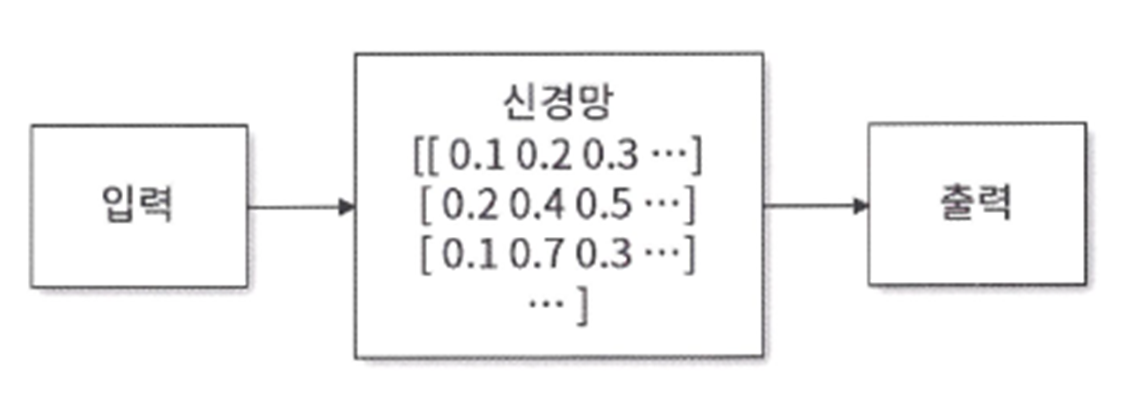

TMI<br>
<font size="2em" color="gray">
신경망의 초기값 지정 방식은 <br>
Xavier 초기화와 He 초기화가 존재한다. <br>
이 방법들은 랜덤하지만 어느정도 규칙성은 있다.
</font>



> 뉴런

<font size="2em" color="gray">
신경망 = 레이어 + 레이어 + ... + 레이어 <br>
레이어 = 뉴런 + 뉴런 + ... + 뉴런 <br>
뉴런 = 입력(X) + 가중치(w) + 활성화함수(f) + 출력(Y) <br>
</font>

가중치를 변화시켜 출력을 변화시킨다. 가중치는 처음에 랜덤한 값을 넣고 학습을 통해 일정한 값으로 수렴시킨다.

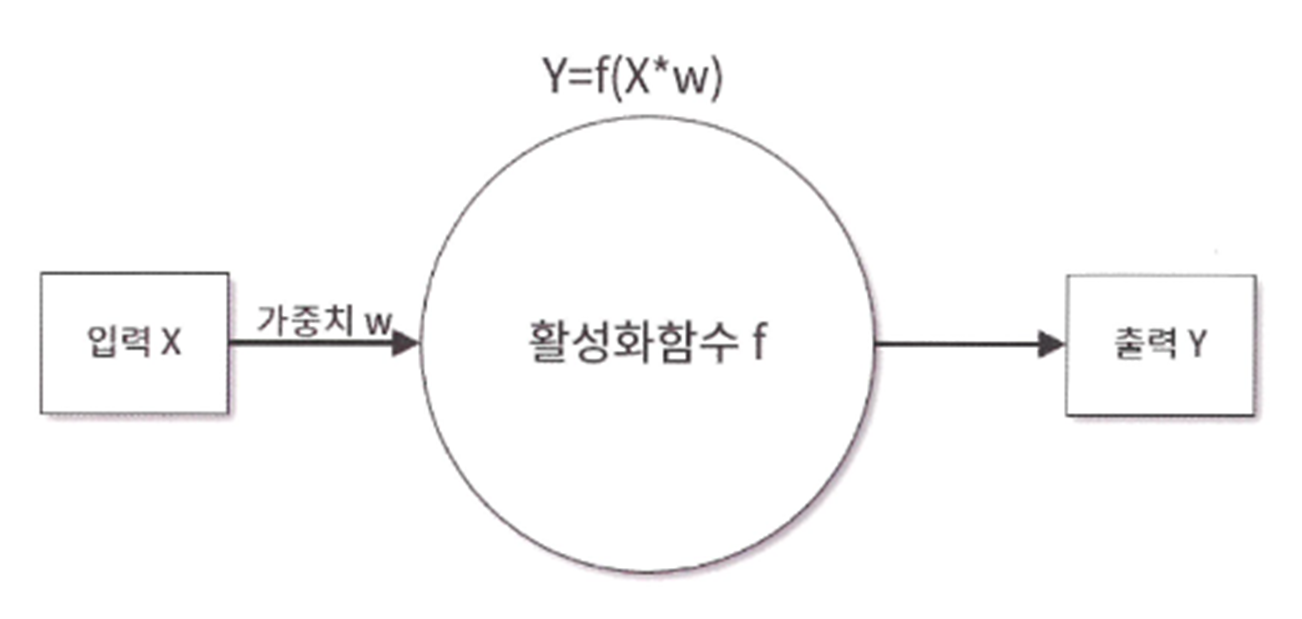

**활성화함수 >**

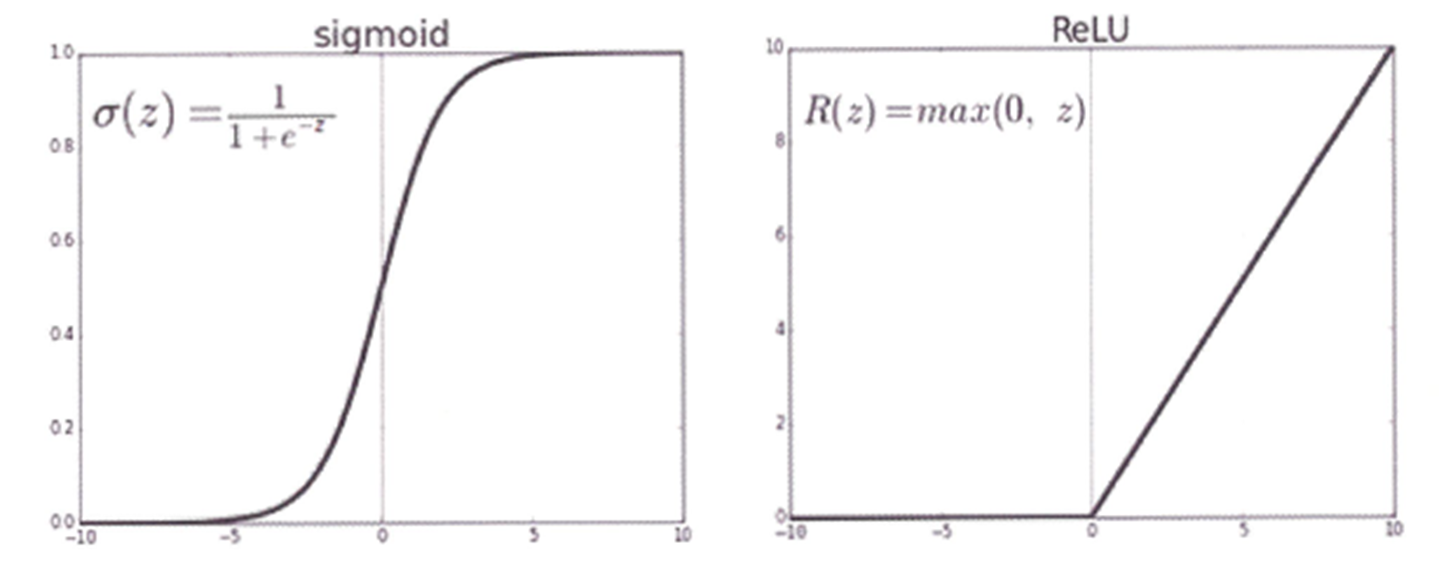

 **경사하강법 >** <br>
 w에 입력과 학습률 및 에러를 곱한 값을 더해주는 방법 <br>
 <font size="2em" color="gray">
 학습률 : 에러를 얼마나 반영할지에 대한 척도 <br>
 에러 : 원하는 출력값과 현재 출력값의 차이
 </font>

In [2]:
# Example : 입력이 1일 때 기대 출력이 0인 뉴런 만들기

import math

# 시그모이드 함수
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

x = 1
y = 0
w = tf.random.normal([1],0,1) #정규 분포의 난수 생성

# 경사 하강법을 통한 뉴런 1000회 학습
for i in range(1000):
  output = sigmoid(x*w)
  error = y - output
  w = w + x * 0.1 * error

  if i%100 == 99:
    print((int)((i-99)/100), error, output)

0 -0.10406369813074555 0.10406369813074555
1 -0.052879573729936076 0.052879573729936076
2 -0.03508455209952467 0.03508455209952467
3 -0.026167851915999372 0.026167851915999372
4 -0.020836404835607877 0.020836404835607877
5 -0.01729729855298975 0.01729729855298975
6 -0.014779678343306802 0.014779678343306802
7 -0.012898343453793561 0.012898343453793561
8 -0.011439824359569981 0.011439824359569981
9 -0.010276344379406404 0.010276344379406404


**편향값>**

입력값 X에 0이 들어간 경우 뉴런이 아무것도 배우지 못하는 경우를 방지하기 위해 한쪽으로 치우친 고정된 값을 받는다.

<font size="2em" color="gray">
y = f(w * x)  # 기존 <br>
y = f(w * x + b)  # 편향값 적용 <br>
</font>

편향값은 w처럼 난수로 초기화되며 뉴런에 더해져서 출력을 계산하게 된다.

In [3]:
# Example : 입력이 0일 때 기대 출력이 1인 뉴런 만들기

import math

# 시그모이드 함수
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

x = 0
y = 1
w = tf.random.normal([1],0,1) #정규 분포의 난수 생성
b = tf.random.normal([1],0,1) #정규 분포의 난수 생성

# 경사 하강법을 통한 뉴런 1000회 학습
for i in range(1000):
  output = sigmoid(x*w + b)
  error = y - output
  w = w + x * 0.1 * error
  b = b + 1 * 0.1 * error

  if i%100 == 99:
    print((int)((i-99)/100), error, output)

0 0.12127938373527192 0.8787206162647281
1 0.05726613929347424 0.9427338607065258
2 0.037001181351146384 0.9629988186488536
3 0.027229584551225372 0.9727704154487746
4 0.021507769990951164 0.9784922300090488
5 0.017759125544737686 0.9822408744552623
6 0.015116367242235418 0.9848836327577646
7 0.013154544453829131 0.9868454555461709
8 0.011641187202474979 0.988358812797525
9 0.01043873509841653 0.9895612649015835


In [4]:
# Example : AND 연산 신경망 만들기
# 하나의 뉴런은 여러 개의 입력을 받아야 한다
# 즉, 입력 2개 가중치 2개 사용.
# y = f(X1*w1 + X2*w2 + b)

import tensorflow as tf
import numpy as np
import math

# 시그모이드 함수
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

#학습 데이터 만들기
x = np.array([[1,1], [1,0], [0,1], [0,0]]) #학습 데이터
y = np.array([[1],[0],[0],[0]])            #정답 데이터

w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)

for i in range(2000): #반복 학습 수
  error_sum = 0 #총 에러 합
  for j in range(4): #준비한 학습 데이터 학습
    output=sigmoid(np.sum(x[j]*w)+b) #결과 구하기
    error = y[j][0]-output           #에러 구하기
    w = w + x[j]*0.1*error           #경사 하강법
    b = b + 0.1*error                #편향 가중치 학습
    error_sum += error               #에러의 총 합 구하기

  if i%200==199:
    print(i, error_sum) #에러의 총 합 확인

199 -0.10926313618470529
399 -0.06533546286267192
599 -0.0464874699534187
799 -0.03597404016540461
999 -0.029286728273337063
1199 -0.024666460158089425
1399 -0.02129025501740012
1599 -0.018716850572108416
1799 -0.016691967905651077
1999 -0.015058082191877117


In [5]:
# 모델 평가

for i in range(4):
  print('X:',x[i],' Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1]  Y: [1] Output: 0.9648449331077206
X: [1 0]  Y: [0] Output: 0.02491189464158592
X: [0 1]  Y: [0] Output: 0.024988259290177225
X: [0 0]  Y: [0] Output: 2.3856619196364026e-05


**레이어**

뉴런의 중간 계산이 0에 가까워져 학습이 중단되는 것을 방지하기 위해 여러개의 뉴런을 사용한다.
<font size="2em" color="gray">
tf.keras를 이용하여 레이어 만들기
</font>

```
tf.keras.Sequential([레이어,레이어])
#레이어 합치기

tf.keras.layers.Dense(뉴런 수, 활성화 함수, 입력 차원(첫 레이어만)) 
# 레이어 정의

model.compile(최적화 함수, 손실값(에러))
# 모델 최적화

tf.keras.optimizers.SGD(학습률)
# 확률적 경사 하강법

model.summary() 
#신경망 네트워크의 구조 출력

model.fit(x,y,epochs, batch_size)
# 신경망 학습
# x는 입력, y는 출력. epochs에 지정된 수만큼 학습
# batch_size는 한 번에 학습시키는 데이터의 수

model.predict(x)
#네트워크의 출력 결과
```



In [6]:
import tensorflow as tf
import numpy as np

#학습 데이터 만들기
x = np.array([[1,1], [1,0], [0,1], [0,0]]) #학습 데이터
y = np.array([[0],[1],[1],[0]])            #정답 데이터

model=tf.keras.Sequential([
	tf.keras.layers.Dense(units=2, activation= 'sigmoid', input_shape=(2,)),
	tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.1), loss= 'mse')
model.summary()

history = model.fit(x,y,epochs=3000,batch_size=1)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4/4 [==============================] - 0s 7ms/step - loss: 0.2223
Epoch 502/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.2222
Epoch 503/3000
4/4 [==============================] - 0s 7ms/step - loss: 0.2220
Epoch 504/3000
4/4 [==============================] - 0s 6ms/step - loss: 0.2219
Epoch 505/3000
4/4 [==============================] - 0s 6ms/step - loss: 0.2218
Epoch 506/3000
4/4 [==============================] - 0s 6ms/step - loss: 0.2217
Epoch 507/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.2216
Epoch 508/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.2214
Epoch 509/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.2214
Epoch 510/3000
4/4 [==============================] - 0s 6ms/step - loss: 0.2213
Epoch 511/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.2211
Epoch 512/3000
4/4 [==============================] - 0s 6ms/step - loss: 0.2211
Epoch 5

In [7]:
model.predict(x)

1/1 [==============================] - 0s 290ms/step


array([[0.08380077],
       [0.91815937],
       [0.9184391 ],
       [0.06599184]], dtype=float32)